In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\demo_data\demo_data\7.xor.csv",header=None)

In [3]:
data.head()

,0,1,2
0,1.764052,0.400157,-1.0
1,0.978738,2.240893,-1.0
2,1.867558,-0.977278,1.0
3,0.950088,-0.151357,1.0
4,-0.103219,0.410599,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [5]:
data.shape

(500, 3)

In [6]:
data.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [7]:
data.duplicated().sum()

0

C:\Users\HP\OneDrive\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

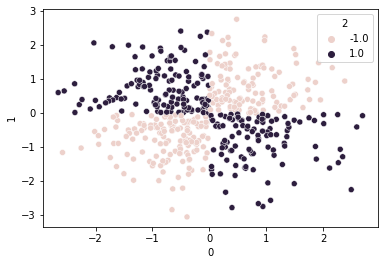

In [8]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[[0,1]],data[2],test_size=0.2,random_state=42)

In [10]:
X_train.shape,X_test.shape

((400, 2), (100, 2))

In [11]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_tr = scale.fit_transform(X_train)
X_test_tr = scale.transform(X_test)

In [12]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [13]:
model = Sequential()

model.add(Dense(5,activation="relu",input_dim=2))
model.add(Dense(3,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 2)                 8         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [16]:
history = model.fit(X_train_tr,y_train,epochs=900,batch_size=12,validation_split=0.2)

Epoch 1/900
27/27 [==============================] - 1s 10ms/step - loss: 0.6900 - accuracy: 0.3250 - val_loss: 0.6600 - val_accuracy: 0.3750
Epoch 2/900
27/27 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.3406 - val_loss: 0.6333 - val_accuracy: 0.3750
Epoch 3/900
27/27 [==============================] - 0s 2ms/step - loss: 0.6289 - accuracy: 0.3656 - val_loss: 0.6154 - val_accuracy: 0.4000
Epoch 4/900
27/27 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.3594 - val_loss: 0.5984 - val_accuracy: 0.3750
Epoch 5/900
27/27 [==============================] - 0s 2ms/step - loss: 0.5917 - accuracy: 0.3344 - val_loss: 0.5816 - val_accuracy: 0.3500
Epoch 6/900
27/27 [==============================] - 0s 1ms/step - loss: 0.5730 - accuracy: 0.3281 - val_loss: 0.5641 - val_accuracy: 0.3500
Epoch 7/900
27/27 [==============================] - 0s 2ms/step - loss: 0.5546 - accuracy: 0.3219 - val_loss: 0.5454 - val_accuracy: 0.3500
Epoch 8/900


In [17]:
y_cap=model.predict(X_test_tr)

4/4 [==============================] - 0s 6ms/step


In [18]:
y_capf=np.where(y_cap>0.5,1,0)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.51

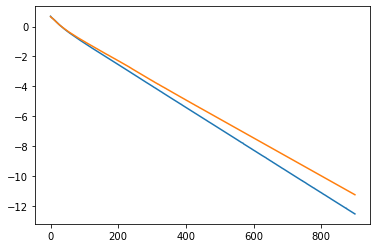

In [20]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [21]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 4s 981us/step


<AxesSubplot:>

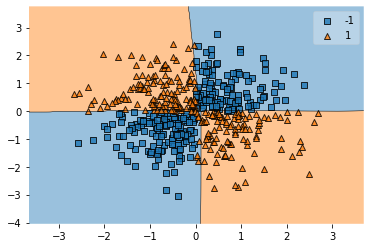

In [22]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

3888/3888 [==============================] - 4s 1ms/step


<AxesSubplot:>

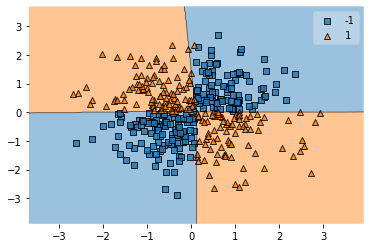

In [23]:
plot_decision_regions(X_train_tr,y_train.values.astype(int),clf=model)

7776/7776 [==============================] - 10s 1ms/step


<AxesSubplot:>

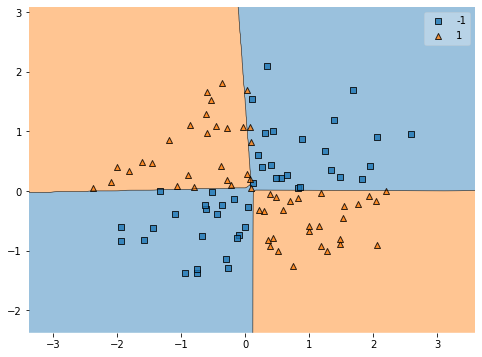

In [24]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_test_tr,y_test.values.astype(int),clf=model)